In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import math
import random
import sys

In [2]:
ps1=cv2.imread(r".C:\\Users\\Aanchal Verma\\Desktop\\OpenCV PROJECTS\Images Trainer\images\Building\Img1.jpg",0)
plt.imshow(ps1,cmap = 'gray')
plt.title('Image'), plt.xticks([]), plt.yticks([])
plt.show()

TypeError: Image data cannot be converted to float

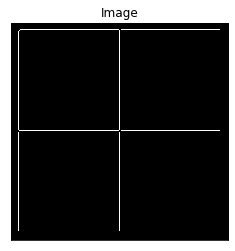

In [5]:
edge_ps1=cv2.Canny(ps1, 50, 200, None, 3)
plt.imshow(edge_ps1,cmap = 'gray')
plt.title('Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [12]:
def hough2(img,ran=(-90,90,1)):
    bw=img.copy()
    h,w=bw.shape
    low,high,diff=ran
    diagonal=math.ceil(math.sqrt( h*h + w*w ))
    c = np.zeros([diagonal+1, len(range(low,high,diff))])
    for i in range(h):
        for j in range(w):
            if(bw[i,j]!=0):
                for theta in range(low,high,diff):
                    d=i*math.sin(math.radians(theta)) + j*math.cos(math.radians(theta))
                    d=round(d)
                    d_loc=d
                    # theta_loc=round((high+theta)/diff)
                    theta_loc=theta
                    c[d,theta_loc]+=1
    return c

def hough_peaks(harray,lines):
    ha=harray.copy()
    ans=np.zeros([lines,1,2])
    i = 0
    while i < lines:
        h=np.where(ha==ha.max())
        for x in range(h[0].shape[0]):
            if(i>=lines):
                break
            ans[i]=[[h[0][x],math.radians(h[1][x])]]
            i=i+1
        ha[ha==ha.max()]=0
    return ans


def hough_lines_draw(lines,img):
    dst = img.copy()
    cdst = cv2.cvtColor(dst, cv2.COLOR_GRAY2BGR)
    if lines is not None:
        for i in range(0, len(lines)):
            rho = lines[i][0][0]
            theta = lines[i][0][1]
            a = math.cos(theta)
            b = math.sin(theta)
            x0 = a * rho
            y0 = b * rho
            pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
            pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
            cv2.line(cdst, pt1, pt2, (255,0,0), 3, cv2.LINE_AA)
    plt.imshow(cdst)
    plt.title('Detected Lines (in red) - Standard Hough Line Transform'), plt.xticks([]), plt.yticks([])
    plt.show()

In [7]:
hough_array2 = hough2(edge_ps1,(0,180,1))

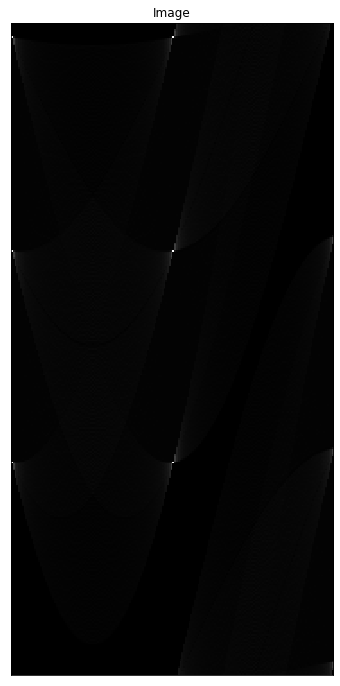

In [8]:
figure(figsize=(12,12))
plt.imshow(hough_array2,cmap = 'gray')
plt.title('Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [9]:
lines=hough_peaks(hough_array2,6)

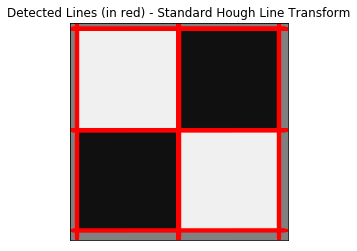

In [13]:
hough_lines_draw(lines,ps1)

In [ ]:
#Question-2

In [2]:
def harris_corner(img_original,gradx,grady,w,alpha):
    img=img_original.copy()
    m_ix2=np.square((gradx).astype(np.float))
    m_iy2=np.square((grady).astype(np.float))
    m_ixy=np.multiply((gradx).astype(np.float),(grady).astype(np.float))
    mf_ix2 = cv2.GaussianBlur(m_ix2.astype(np.float),(w,w),cv2.BORDER_DEFAULT)
    mf_iy2 = cv2.GaussianBlur(m_iy2.astype(np.float),(w,w),cv2.BORDER_DEFAULT)
    mf_ixy = cv2.GaussianBlur(m_ixy.astype(np.float),(w,w),cv2.BORDER_DEFAULT)
    dst = np.zeros(img_original.shape)
    dst = np.subtract(np.subtract(np.multiply(mf_ix2,mf_iy2),np.square(mf_ixy)),np.multiply(alpha,np.square(np.add(mf_ix2,mf_iy2))))
    return dst

In [3]:
def harris_corner_detection(img,gausian_sigma=0,window=3,alpha=0.05,threshold=0.8):
    
    #gradient of images
    transA=img.copy()
    transAout1=np.zeros(img.shape)
    transAout2=np.zeros(img.shape)
    gaussian_filter1d(transA, gausian_sigma, axis=0, order=1, output=transAout1, mode='reflect', cval=0.0, truncate=4.0)
    gaussian_filter1d(transA, gausian_sigma, axis=1, order=1, output=transAout2, mode='reflect', cval=0.0, truncate=4.0)
    
    transAout=np.concatenate((transAout1, transAout2), axis=1)
    plt.imshow(transAout,cmap = 'gray')
    plt.title('concatenated_plot of gradient(before normalization)'), plt.xticks([]), plt.yticks([])
    plt.show()
    
    #harris corner (response funtion)
    ans=harris_corner(transA,transAout1,transAout2,window,alpha)
    ans1=ans.copy()
    plt.imshow(ans,cmap = 'gray')
    plt.title('response funtion'), plt.xticks([]), plt.yticks([])
    plt.show()
    
    #edges<0 hence zero
    ans1[ans1<=0]=0
    plt.imshow(ans1,cmap = 'gray')
    plt.title('edge removal'), plt.xticks([]), plt.yticks([])
    plt.show()
    
    #thresholding
    ans2=ans1.copy()
    ans2[ans1<=ans1.max()*threshold]=0
    plt.imshow(ans2,cmap = 'gray')
    plt.title('Thresholding'), plt.xticks([]), plt.yticks([])
    plt.show()
    
    #Local Maxima of Response function
    kernel = np.ones((5,5),np.uint8)
    dil_ans2 = cv2.dilate(ans2,kernel,iterations = 1)
    final_answer=ans2.copy()
    final_answer[ans2!=dil_ans2]=0
    final_answer[final_answer>0]=255
    final_answer=final_answer.astype(np.uint8)
    plt.imshow(final_answer,cmap = 'gray')
    plt.title('Local Maxima of Response function'), plt.xticks([]), plt.yticks([])
    plt.show()
    
#   cv2.rectangle(img, (x1, y1), (x2, y2), (255,0,0), 2)
    #ploting them as red on the image
    cdst = cv2.cvtColor(final_answer.astype(np.uint8), cv2.COLOR_GRAY2BGR)
    dst = cv2.cvtColor(transA, cv2.COLOR_GRAY2BGR)
    for i in range(final_answer.shape[0]):
        for j in range(final_answer.shape[1]):
            if final_answer[i,j]!=0:
                cv2.rectangle(dst, (j-1, i-1), (j+1, i+1), (255,0,0), 1)
#     dst[final_answer==255]=(255,0,0)
    
    return transAout1,transAout2,final_answer,dst

In [4]:
def sift(test_img,final_answer,transAout1,transAout2,size=3):
    points = []
    for i in range(final_answer.shape[0]):
        for j in range(final_answer.shape[1]):
            if final_answer[i,j]!=0:
                point = cv2.KeyPoint(x=j,y=i, _size = size, _angle = math.atan(transAout2[i,j]/transAout1[i,j]), _octave=0)
                points.append(point)
    sift = cv2.xfeatures2d.SIFT_create()
    points,descriptors = sift.compute(test_img,points)
    return points,descriptors

In [14]:
def match_affine(test_img1,test_img2,points_a,descriptors_a,points_b,descriptors_b):
    bfm = cv2.BFMatcher()
    matches = bfm.match(descriptors_a, descriptors_b)
    max_set=[]
    max_count=0
    output_test=np.concatenate((test_img1, test_img2), axis=0)
    print(len(matches))
    N = np.Infinity
    sample_count=0
    e = 1.0
    p = 0.99
    
    while N>sample_count:
        while True:
            i1, i2, i3 = random.sample(matches, 3)
            v1 = points_a[i1.queryIdx].pt[0]
            v2 = points_a[i2.queryIdx].pt[0]
            v3 = points_a[i3.queryIdx].pt[0]
            w1 = points_a[i1.queryIdx].pt[1]
            w2 = points_a[i2.queryIdx].pt[1]
            w3 = points_a[i3.queryIdx].pt[1]
            x1 = points_b[i1.trainIdx].pt[0]
            x2 = points_b[i2.trainIdx].pt[0]
            x3 = points_b[i3.trainIdx].pt[0]
            y1 = points_b[i1.trainIdx].pt[1]
            y2 = points_b[i2.trainIdx].pt[1]
            y3 = points_b[i3.trainIdx].pt[1]

            X = np.matrix([[x1, y1, 1],[x2, y2, 1] ,[x3, y3, 1]])
            U = np.matrix([[v1, w1, 1],[v2, w2, 1] ,[v3, w3, 1]])
            
            if np.linalg.cond(U) < 1/sys.float_info.epsilon:
                break
        U_1 = np.linalg.inv(U)
        T = np.dot(U_1,X)
        count=0
        set = []
        for j in matches:
            v11 = points_a[j.queryIdx].pt[0]
            w11 = points_a[j.queryIdx].pt[1]
            x11 = points_b[j.trainIdx].pt[0]
            y11 = points_b[j.trainIdx].pt[1]
            tempU = np.matrix([[v11, w11, 1]])
            tempX = np.dot(tempU,T)
            x12 = tempX[0,0]
            y12 = tempX[0,1]
            diffx = abs(x11-x12)
            diffy = abs(y11-y12)
            if (diffx<=2 and diffy<=2):
                set.append(j)
                count=count+1
        if count>max_count:
            max_count=count
            max_set=set
        
        e0 = 1 - (max_count/len(matches))
        if e0 < e:
            e=e0
            N=math.log(1-p)/math.log(1-pow((1-e),6))
        sample_count+=1
#         print(N,sample_count)

    output_test=np.concatenate((test_img1, test_img2), axis=0)
    cdst = cv2.cvtColor(output_test, cv2.COLOR_GRAY2BGR)
    count=1
    for i in max_set:
        pt1=(round(points_a[i.queryIdx].pt[0]),round(points_a[i.queryIdx].pt[1]))
        pt2=(round(points_b[i.trainIdx].pt[0]),test_img1.shape[0]+round(points_b[i.trainIdx].pt[1]))
        cv2.line(cdst, pt1, pt2, (255,0,0), 1, cv2.LINE_AA)
        count=count+1
    figure(figsize=(20,20))
    plt.imshow(cdst,cmap = 'gray')
    plt.title('Image'), plt.xticks([]), plt.yticks([])
    plt.show()
    return max_set

In [19]:
test_img1=cv2.imread("material/transA.jpg",0)
test_img2=cv2.imread("material/transB.jpg",0)

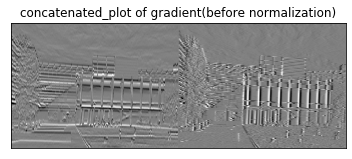

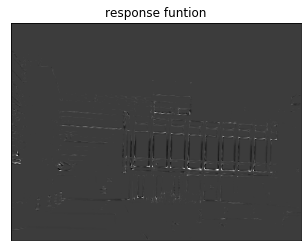

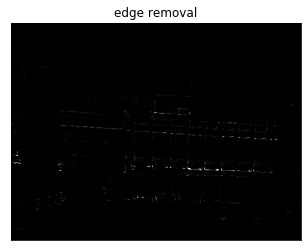

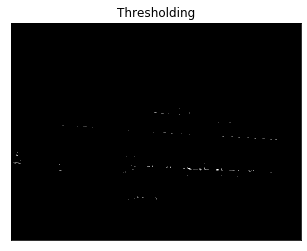

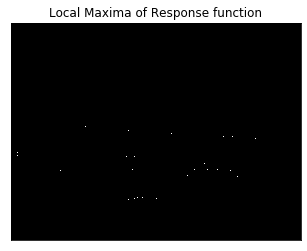

In [20]:
transAout11,transAout21,final_answer1,test_result1=harris_corner_detection(test_img1,gausian_sigma=3,window=3,alpha=0.031,threshold=0.2)

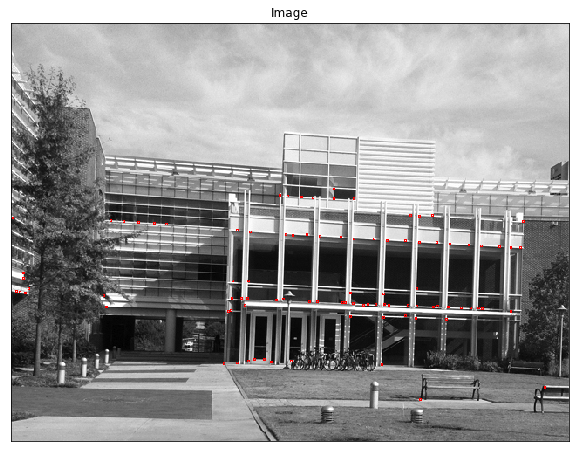

In [23]:
figure(figsize=(10,10))
plt.imshow(test_result1,cmap = 'gray')
plt.title('Image'), plt.xticks([]), plt.yticks([])
plt.show()

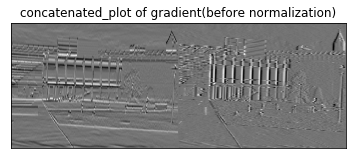

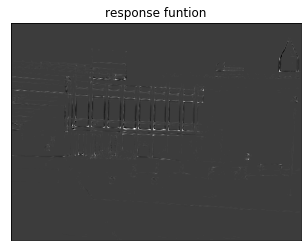

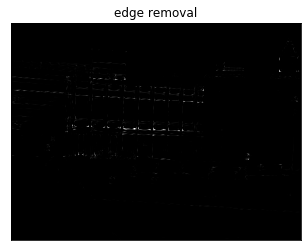

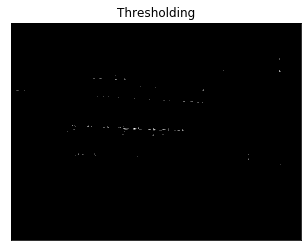

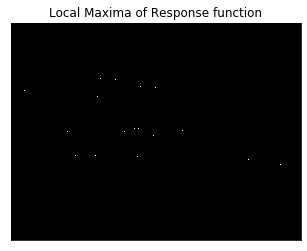

In [22]:
transAout12,transAout22,final_answer2,test_result2=harris_corner_detection(test_img2,gausian_sigma=3,window=3,alpha=0.031,threshold=0.2)

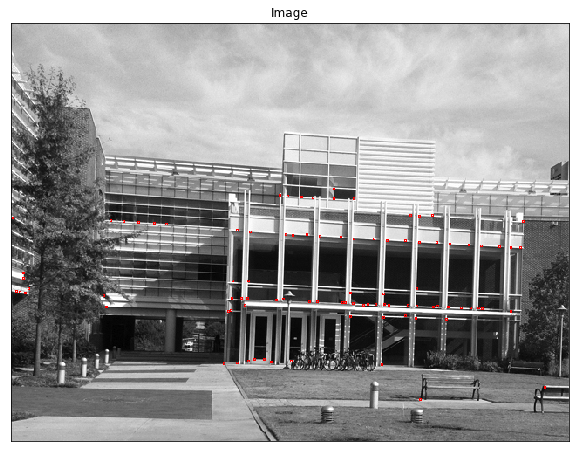

In [24]:
figure(figsize=(10,10))
plt.imshow(test_result1,cmap = 'gray')
plt.title('Image'), plt.xticks([]), plt.yticks([])
plt.show()

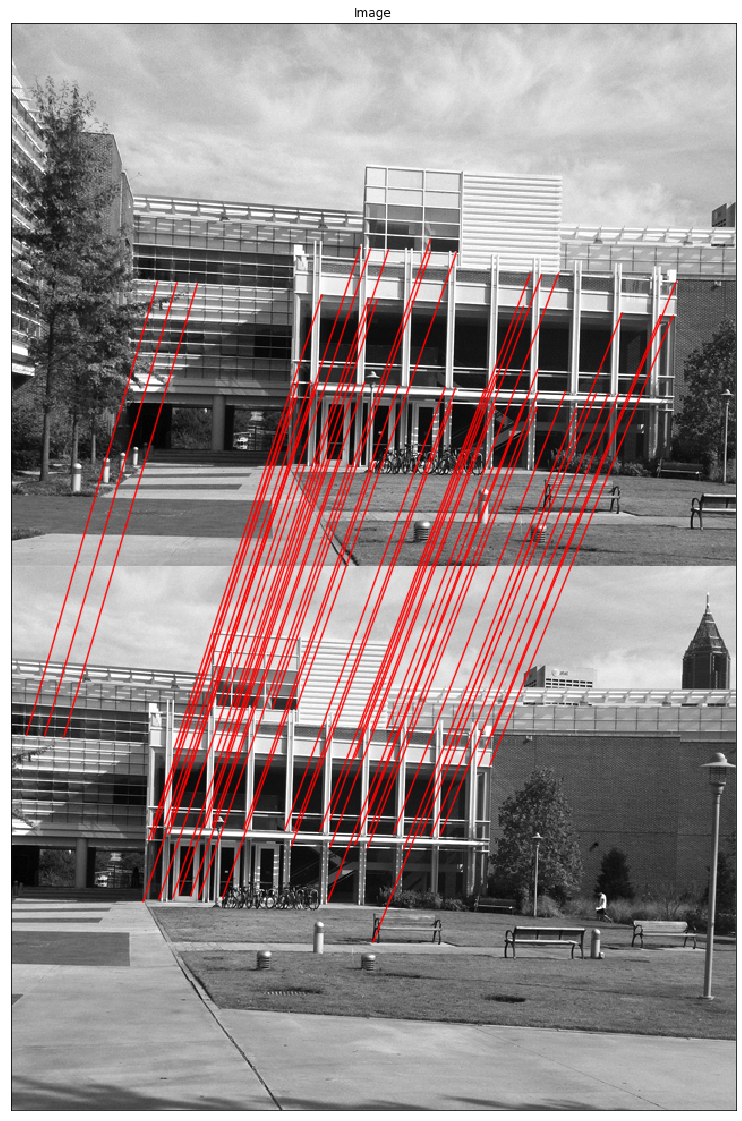

In [26]:
points_a,descriptors_a=sift(test_img1,final_answer1,transAout11,transAout12)
points_b,descriptors_b=sift(test_img2,final_answer2,transAout21,transAout22)
point_set=match_affine(test_img1,test_img2,points_a,descriptors_a,points_b,descriptors_b)

In [12]:
##SIMA and SIMB

In [7]:
test_img1=cv2.imread("material/simA.jpg",0)
test_img2=cv2.imread("material/simB.jpg",0)

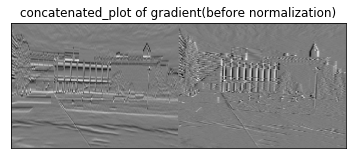

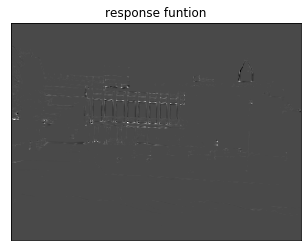

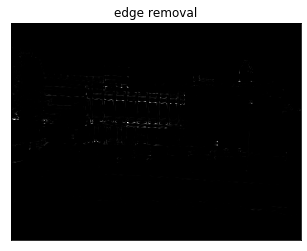

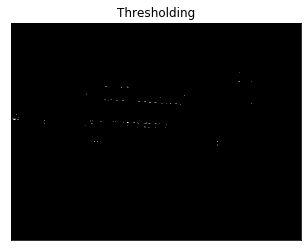

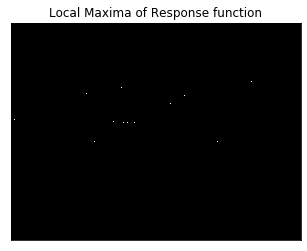

In [8]:
transAout11,transAout21,final_answer1,test_result1=harris_corner_detection(test_img1,gausian_sigma=3,window=3,alpha=0.031,threshold=0.2)

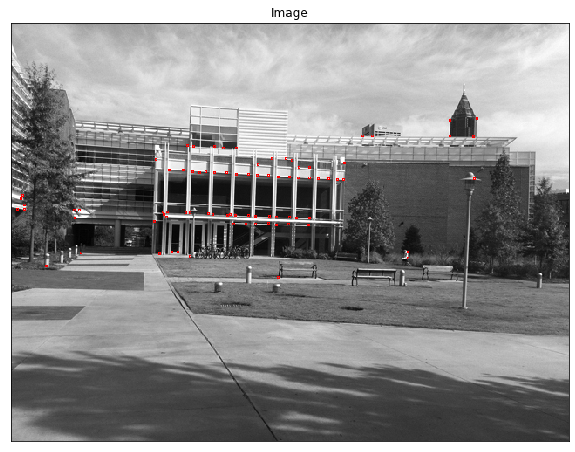

In [10]:
figure(figsize=(10,10))
plt.imshow(test_result1,cmap = 'gray')
plt.title('Image'), plt.xticks([]), plt.yticks([])
plt.show()

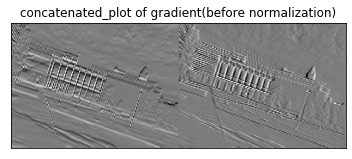

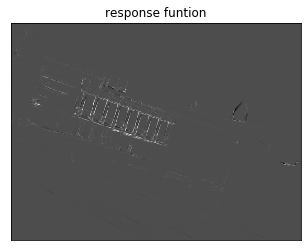

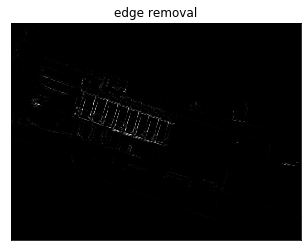

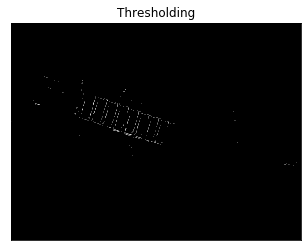

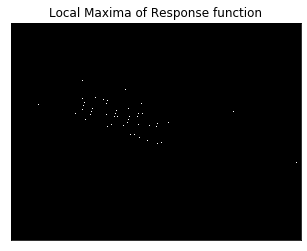

In [11]:
transAout12,transAout22,final_answer2,test_result2=harris_corner_detection(test_img2,gausian_sigma=3,window=3,alpha=0.031,threshold=0.2)

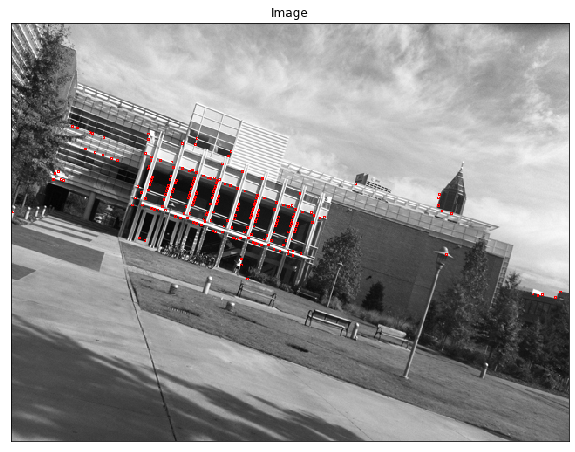

In [12]:
figure(figsize=(10,10))
plt.imshow(test_result2,cmap = 'gray')
plt.title('Image'), plt.xticks([]), plt.yticks([])
plt.show()

82


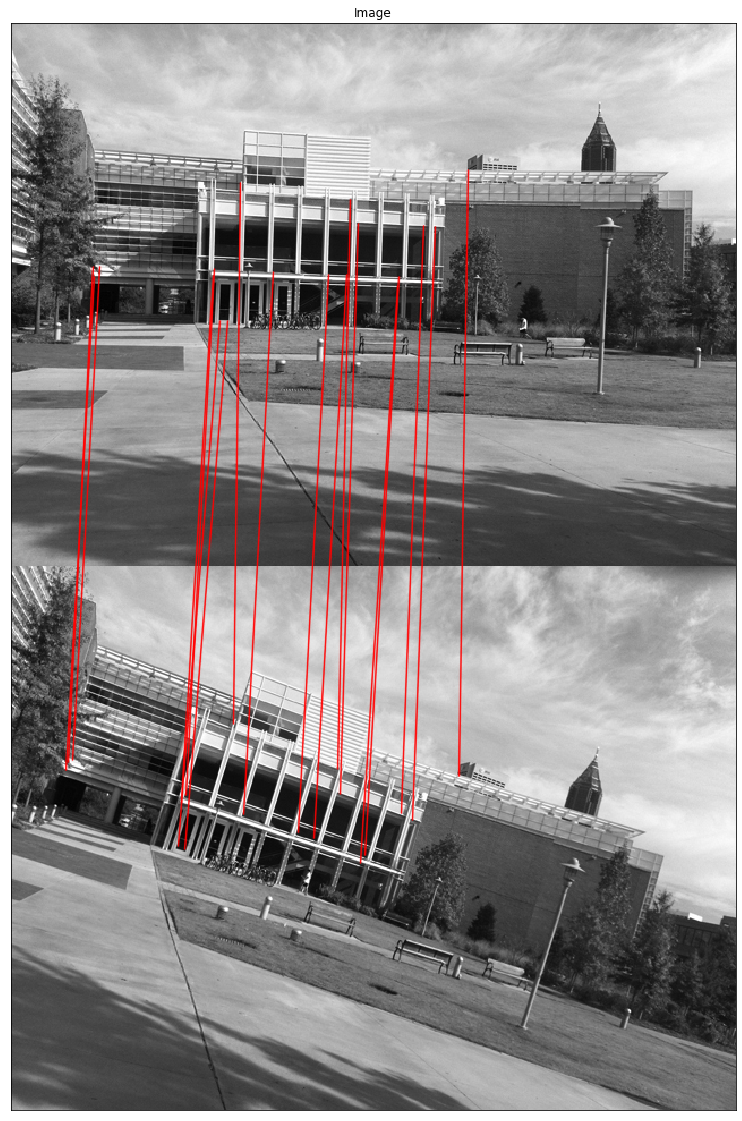

In [15]:
points_a,descriptors_a=sift(test_img1,final_answer1,transAout11,transAout12,5)
points_b,descriptors_b=sift(test_img2,final_answer2,transAout21,transAout22,5)
point_set=match_affine(test_img1,test_img2,points_a,descriptors_a,points_b,descriptors_b)

In [ ]:
# def sift(test_img,final_answer,transAout1,transAout2):
#     points = []
#     for i in range(final_answer.shape[0]):
#         for j in range(final_answer.shape[1]):
#             if final_answer[i,j]!=0:
#                 point = cv2.KeyPoint(x=j,y=i, _size = 3, _angle = math.atan(transAout2[i,j]/transAout1[i,j]), _octave=0)
#                 points.append(point)
#     sift = cv2.xfeatures2d.SIFT_create()
#     points,descriptors = sift.compute(test_img,points)
#     return points,descriptors

# def match(test_img1,test_img2,points_a,descriptors_a,points_b,descriptors_b):
#     bfm = cv2.BFMatcher()
#     matches = bfm.match(descriptors_a, descriptors_b)
#     max_set=[]
#     max_count=0
#     max_diff1=0
#     max_diff2=0
#     output_test=np.concatenate((test_img1, test_img2), axis=0)
#     for i in matches:
#         diff1=(points_a[i.queryIdx].pt[0]-points_b[i.trainIdx].pt[0])
#         diff2=(points_a[i.queryIdx].pt[1]-points_b[i.trainIdx].pt[1])
#         rat1=diff2/diff1
#         set=[]
#         count=0
#         for j in matches:
#             d1=(points_a[j.queryIdx].pt[0]-points_b[j.trainIdx].pt[0])
#             d2=(points_a[j.queryIdx].pt[1]-points_b[j.trainIdx].pt[1])
#             rat2=d2/d1
#             if (rat2>=rat1-0.005 and rat2<=rat1+0.005) :
#                 set.append(j)
#                 count=count+1
#         if count>=max_count:
#             max_count=count
#             max_set=set
#             max_diff1=diff1
#             max_diff2=diff2

#     output_test=np.concatenate((test_img1, test_img2), axis=1)
#     cdst = cv2.cvtColor(output_test, cv2.COLOR_GRAY2BGR)
#     count=1
#     for i in max_set:
#         pt1=(round(points_a[i.queryIdx].pt[0])-1,round(points_a[i.queryIdx].pt[1])-1)
#         pt2=(round(test_img1.shape[1]+points_b[i.trainIdx].pt[0])+1,round(points_b[i.trainIdx].pt[1])+1)
#         cv2.line(cdst, pt1, pt2, (255,0,0), 1, cv2.LINE_AA)
#         count=count+1
#     figure(figsize=(20,20))
#     plt.imshow(cdst,cmap = 'gray')
#     plt.title('Image'), plt.xticks([]), plt.yticks([])
#     plt.show()
#     return max_set